$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\wv_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

## The Wonderful World of ML - Session 5 Discussion: Trees

Trees, which are also referred to as "decision trees" are the most basic of the machine leaning models.  The idea behind their construction is based on chopping up or partitioning feature space in a manner that best describes the data.  Their strength lies primarily in their interpretability, while their weekness lies in their inability to describe for complex relationships.

Let's start by taking a look a couple of simple trees. The data for the tree in **Figure 1.A** was taken from the **ISLR** package in **R** and can be found [here](https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/data/HittersISLR.csv) (1.).  The data for the tree in **Figure 1.B** was originally downloaded from [here](http://www-bcf.usc.edu/~gareth/ISL/Heart.csv), but it has been replicated [here](https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/data/Heart.csv) in case the original link goes away.

<img src="https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/docs/graphics/Trees_03_Fig1.jpg">

**Figure 1.A** shows an example of a **regression tree**.  **Figure 1.B** shows an example of a **classification tree**.  While both of these trees are binary (only split 2 ways at each node), they can contain more than 2 splits at any node as shown by the **Credit** node in **Figure 2.** below.

<img src="https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/docs/graphics/Trees_04_Fig2.jpg">

Another difference to notice are the types of variable each node is split on.  In **Figure 1.A**, all the nodes are continuous variables.  In **Figure 2.**, all the nodes are treated as catagorical.  In **Figure 1.B**, the root (top) node is catagorical and the rest are continuous.  So trees are flexible enough to handle both catagorical and continuous variables.

So once we have trained/built our tree, how do we make a prediction with new data?  This turns out to pretty easy.  All we have to do is follow the path from the root node to a leaf node.  Let's do a simple example.

### Make a prediction with a tree

#### Example 1. - Regression

Assume that the **leaf nodes** (terminal nodes at the bottom of the tree where values for predicitons are obtained) in **Figure 1.A** are log (base 10) values of salaries for baseball players.  What would the model predict for the salary of a player that has been in the league 7 years and had 113 hits?

#### Answer 1.

Starting at the top (root) node of the tree in **Figure 1.A**, we traverse right because 7 > 4.5.  This brings us to the **Hits** node where we split left because 113 < 117.5.  This brings us to the leaf with value of **6.0**.  Since this is the base-10 log of the salary, our prediction would be:

In [31]:
print("predicted salary = ${:.2f}".format(10**(6.0)))

predicted salary = $1000000.00


#### Things to notice

Notice how this regression tree will output the same value for a whole region of feature space.  For example, if we a player had been playing for 10 years and had 115 hits, the prediction would be the same.

#### Example 2. - Classification

The leaf nodes in **Figure 1.B** represent the presence of heart disease.  A **Yes** means that heart disease is present and **No** means heart disease is not present.  If the **Thal** (Thallium stress test) is normal (left branch of this node), what would the model predict for an individual with [**Ca**](http://archive.ics.uci.edu/ml/datasets/heart+Disease) < 0.5 and a maximum heart rate (**MaxHR**) > 161.5?  Would the model's prediction change if **MaxHR** < 161.5?

#### Answer 2. 
Following the left branch from the root (**Thal:a**) node, at the **Ca < 0.5** node, we follow the left branch to the **MaxHR** node and then to right **No** leaf node.  Because both leaf nodes under **MaxHR** are **No**, the model prediction would not change if maximum heart rate were < 161.5.

### Building Trees

A tree represents a recipe for how to slice up feature space.  The better the recipe, the better the predictions the tree is able to make.  So how do we build trees that make good predictions on test data?  Like other machine learning models, we typically derive some cost function to minimize or objective function to maximize and trees are no different in this regard.

#### Regression Trees

Like linear regression, the residual sum of squares (RSS) is well suited for training regression trees.  Also similar to linear regression models, we need to select predictors that matter and discard ones that don't.  The way this is typically done for regression trees is to grow a full tree with all the predictors and follow this by applying a technique called **cost complexity pruning** or **weakest link pruning** to remove branches that aren't as important.  See chapter 8 of the ISL for details regarding this procuedure.

#### Classification Trees

Training classification trees requires using one of three typical cost functions: 

+ Overall Error Rate
+ Gini Score
+ Cross-Entropy

#### Overall Error Rate

This is the most intuitive cost function used to building decisions trees.  To compute the overall error rate, we simpy count the number of mistakes the tree made in making predictions and then divide this by the total number of predictions.  Using the overall error rate will work as well as the other two for binary trees because they all are 0 for a pure group (either all group 1, $p_1 = 0$ or all group 2, $p_2 = 0$) and take on their maximum value when a binary group is least pure i.e. when $p_1 = p_2 = 0.5$ as shown in Figure 3. below.

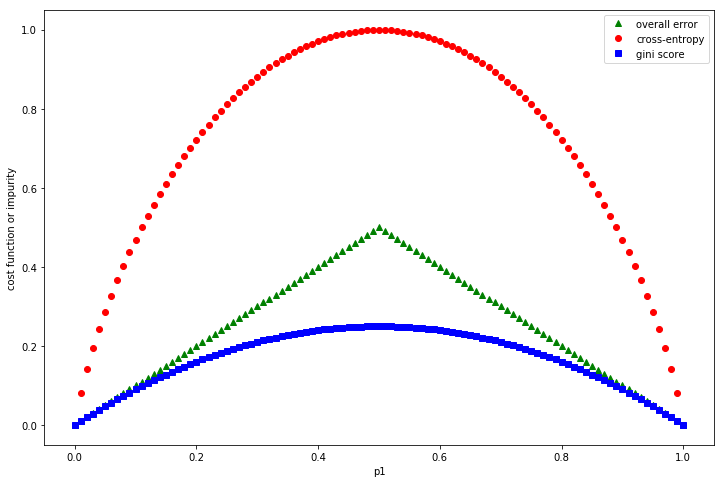

array([ 0.        ,  0.72192809,  0.97095059,  0.97095059,  0.72192809,  0.        ])

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Returns the binary error rate
# prob - probability of one of binary classes
def overallError(prob):
    error = prob
    if(prob > 0.5):
        error = 1 - prob
        
    return error

# Returns the binary cross-entropy cost
# prob - probability of one of binary classes
def crossEntropy(prob):
    if prob > 0 and prob < 1:
        return -((prob * math.log(prob, 2)) + ((1 - prob) * math.log(1 - prob, 2)))
    else:
        return 0.

# Returns the binary gini score
# prob - probability of one of binary classes
def giniScore(prob):
    return prob * (1. - prob)

# vectorize the cost functions
overallError = np.vectorize(overallError)
crossEntropy = np.vectorize(crossEntropy)
giniScore = np.vectorize(giniScore)

probs = np.linspace(0, 1.0, 101)
# Plot 3 cost functions
import matplotlib as mp, matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 8))
plt.plot(probs, overallError(probs), 'g^', label='overall error')
plt.plot(probs, crossEntropy(probs), 'ro', label='cross-entropy')
plt.plot(probs, giniScore(probs), 'bs', label='gini score')
plt.xlabel("p1")
plt.ylabel("cost function or impurity")
plt.legend(loc='upper right')
plt.show()

crossEntropy(np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0]))

The problem with the overall error rate starts to show itself when we try to move beyond binary classification.  When we try to classify into 3 or more classes, we find that the overall error rate is not as sensitive as the *Gini Score* or *Cross-Entropy*.  To see a good little example of why the *Cross-Entropy* is a better cost function, check out [this little write up](http://rpubs.com/mszczepaniak/classificationgoodness).  A similar intuition can be applied in explaining why *Gini Score* is superior to overall error rate as shown [in this spreadsheet](https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/data/gini_score.xls).

#### Overfitting

What might an overfit tree looks like?  Let's take a look at the data used to create **Figure 1.B**.

In [33]:
import pandas as pd
heart_data = pd.read_csv("https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/data/Heart.csv")
heart_data.iloc[:, 1:].head(10)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
8,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
9,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


For illustration purposes, let's pretend these first 10 samples was the training data set.  How well would this tree do at predicting heart diseast (AHD)?

+ If Thal=reversable, **then** AHD = Yes
+ If Thal=fixed, **then** AHD = No
+ If Thal=normal and Ca > 1.0, **then** AHD = Yes
+ Else, AHD = No

This simple tree would result in a 0% error rate (perfect classifier) on the training data.  How would this tree do on unseen?  Let's apply this tree to the next 10 samples:

In [44]:
# Little function that encodes the tree in the prior cell
def overfit(thal, ca) :
    if (thal == "reversable"):
        adh = "Yes"
    elif(thal == "fixed"):
        adh = "No"
    elif(thal == "normal" and ca > 1.0):
        adh = "Yes"
    else:
        adh = "No"
    return adh

overfit = np.vectorize(overfit)
preds = overfit(heart_data.iloc[10:, 13].head(10), heart_data.iloc[10:, 12].head(10))
h = heart_data.iloc[10:, 1:].head(10)
# https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
h['predictions'] = preds
h

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,predictions
10,57,1,asymptomatic,140,192,0,0,148,0,0.4,2,0.0,fixed,No,No
11,56,0,nontypical,140,294,0,2,153,0,1.3,2,0.0,normal,No,No
12,56,1,nonanginal,130,256,1,2,142,1,0.6,2,1.0,fixed,Yes,No
13,44,1,nontypical,120,263,0,0,173,0,0.0,1,0.0,reversable,No,Yes
14,52,1,nonanginal,172,199,1,0,162,0,0.5,1,0.0,reversable,No,Yes
15,57,1,nonanginal,150,168,0,0,174,0,1.6,1,0.0,normal,No,No
16,48,1,nontypical,110,229,0,0,168,0,1.0,3,0.0,reversable,Yes,Yes
17,54,1,asymptomatic,140,239,0,0,160,0,1.2,1,0.0,normal,No,No
18,48,0,nonanginal,130,275,0,0,139,0,0.2,1,0.0,normal,No,No
19,49,1,nontypical,130,266,0,0,171,0,0.6,1,0.0,normal,No,No


Our classifier that did perfectly on the training data would misclassify samples 12, 13, and 14.  Just like fitting a high order polynomial when doing regression, trees can be overfit as well.  How might we regularize our tree models so that they don't overfit our training data?  Good question!  This is the kind of question good machine learning practicioners ask themselves.

### One Option: Take the Gordon Geko approach - ["Greed, for lack of better word, is good!"](https://en.wikipedia.org/wiki/Gordon_Gekko)

The most basic algorithm for fitting a tree is the *top-down, greedy* aka the *recursive binary splitting* algorithm.  It works like this:

1. Select a predictor (e.g. X1).
2. Select a sample (e.g. row[0]).
3. Split all the data in the training set into each of the two classes using the value of the selected predictor on the selected sample as the threshold.  Values less than the threshold, collect in a left group.  Values greater than or equal the threshold, collect into a right group.
4. Compute the cost function for this split. We'll use the gini score.
5. Repeat steps 2. thru 4. for each successive sample value of the predictor selected in step 1. as the threshold
6. Repeat steps 1. thru 5. for the remaining predictors
7. Select the root node and the threshold for all the splits done in steps 1. thru 6. based on the predictor and sample with the minimum value for gini score.
8. Continue repeating steps 1. thru 7. on each resulting split group until some over-fitting criteria is met.



p311 of ISL and
https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/#crayon-599e33756fd9d927607695

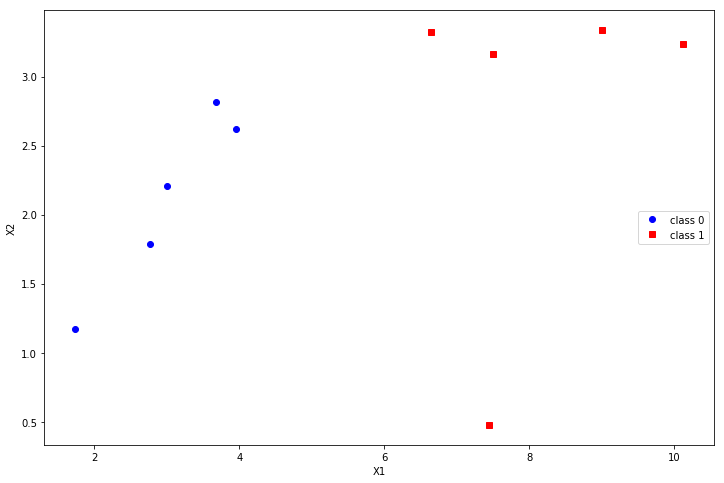

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# test data from http://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
dataset = np.array([[2.771244718,1.784783929,0],
                    [1.728571309,1.169761413,0],
                    [3.678319846,2.81281357,0],
                    [3.961043357,2.61995032,0],
                    [2.999208922,2.209014212,0],
                    [7.497545867,3.162953546,1],
                    [9.00220326,3.339047188,1],
                    [7.444542326,0.476683375,1],
                    [10.12493903,3.234550982,1],
                    [6.642287351,3.319983761,1]])

# Visualize the test data
plt.figure(figsize=(12, 8))
plt.plot(dataset[:5,0], dataset[:5,1], 'bo', label='class 0')
plt.plot(dataset[5:,0], dataset[5:,1], 'rs', label='class 1')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc='center right')
plt.show()


In [4]:
import sys
# https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(0, '../../Python/')
import BinaryDecisionTree as b
split = b.evalSplits(dataset)
print('Split: [X%d < %.3f]' % ((split['index']+1), split['value']))

X1 < 2.771 Gini=0.444
X1 < 1.729 Gini=0.500
X1 < 3.678 Gini=0.286
X1 < 3.961 Gini=0.167
X1 < 2.999 Gini=0.375
X1 < 7.498 Gini=0.286
X1 < 9.002 Gini=0.375
X1 < 7.445 Gini=0.167
X1 < 10.125 Gini=0.444
X1 < 6.642 Gini=0.000
X2 < 1.785 Gini=0.500
X2 < 1.170 Gini=0.444
X2 < 2.813 Gini=0.320
X2 < 2.620 Gini=0.417
X2 < 2.209 Gini=0.476
X2 < 3.163 Gini=0.167
X2 < 3.339 Gini=0.444
X2 < 0.477 Gini=0.500
X2 < 3.235 Gini=0.286
X2 < 3.320 Gini=0.375
Split: [X1 < 6.642]


In [6]:
tree = b.buildTree(dataset, 1, 1)
b.printTree(tree)

X1 < 2.771 Gini=0.444
X1 < 1.729 Gini=0.500
X1 < 3.678 Gini=0.286
X1 < 3.961 Gini=0.167
X1 < 2.999 Gini=0.375
X1 < 7.498 Gini=0.286
X1 < 9.002 Gini=0.375
X1 < 7.445 Gini=0.167
X1 < 10.125 Gini=0.444
X1 < 6.642 Gini=0.000
X2 < 1.785 Gini=0.500
X2 < 1.170 Gini=0.444
X2 < 2.813 Gini=0.320
X2 < 2.620 Gini=0.417
X2 < 2.209 Gini=0.476
X2 < 3.163 Gini=0.167
X2 < 3.339 Gini=0.444
X2 < 0.477 Gini=0.500
X2 < 3.235 Gini=0.286
X2 < 3.320 Gini=0.375
[X1 < 6.642]
 [0.0]
 [1.0]


In [7]:
tree2 = b.buildTree(dataset, 2, 1)
b.printTree(tree2)

X1 < 2.771 Gini=0.444
X1 < 1.729 Gini=0.500
X1 < 3.678 Gini=0.286
X1 < 3.961 Gini=0.167
X1 < 2.999 Gini=0.375
X1 < 7.498 Gini=0.286
X1 < 9.002 Gini=0.375
X1 < 7.445 Gini=0.167
X1 < 10.125 Gini=0.444
X1 < 6.642 Gini=0.000
X2 < 1.785 Gini=0.500
X2 < 1.170 Gini=0.444
X2 < 2.813 Gini=0.320
X2 < 2.620 Gini=0.417
X2 < 2.209 Gini=0.476
X2 < 3.163 Gini=0.167
X2 < 3.339 Gini=0.444
X2 < 0.477 Gini=0.500
X2 < 3.235 Gini=0.286
X2 < 3.320 Gini=0.375
X1 < 2.771 Gini=0.000
X1 < 1.729 Gini=0.000
X1 < 3.678 Gini=0.000
X1 < 3.961 Gini=0.000
X1 < 2.999 Gini=0.000
X2 < 1.785 Gini=0.000
X2 < 1.170 Gini=0.000
X2 < 2.813 Gini=0.000
X2 < 2.620 Gini=0.000
X2 < 2.209 Gini=0.000
X1 < 7.498 Gini=0.000
X1 < 9.002 Gini=0.000
X1 < 7.445 Gini=0.000
X1 < 10.125 Gini=0.000
X1 < 6.642 Gini=0.000
X2 < 3.163 Gini=0.000
X2 < 3.339 Gini=0.000
X2 < 0.477 Gini=0.000
X2 < 3.235 Gini=0.000
X2 < 3.320 Gini=0.000
[X1 < 6.642]
 [X1 < 2.771]
  [0.0]
  [0.0]
 [X1 < 7.498]
  [1.0]
  [1.0]


In [39]:
#  predict with a stump
stump = {'index': 0, 'right': 1, 'value': 6.642287351, 'left': 0}
for row in dataset:
    prediction = b.predict(stump, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


In [40]:
x = [1,2,3]; y = [4,5,6,7]
groups = x, y
group_sizes = [len(group) for group in groups]
group_sizes
sum(group_sizes)

7

### Strength in numbers?

Consider two binary classification scenarios where you've built 3 decision trees in each scenario.  Each of your 3 trees has about the same overall error rate and gini score when run on *test data*.  You think to yourself: *I could run all three models and give each model a **vote** and assign the class based on which one gets the most votes.*

Would this approach lead to a better predictor overall?  Like so many things in life, the answer is: **"it depends"**.  Let's see if we can discover the conditions under which we may or may not improve the prediction accuracy using this voting approach.  Start by considering three scenarios:

+ **Scenario A:** One model tends to make most of its errors by predicting class 0 when truth is class 1.  Another model tends to make most of its errors by predicting class 1 when truth is class 0.  The third model tends to make errors on both classes at roughly and equal rate.
+ **Scenario B:** All three models tend to make most of their errors by predicting class 0 when truth is class 1.
+ **Scenario C:** All three models tend to make most of their errors by predicting class 1 when truth is class 0.

Would you expect any of these scenarios lead to improved prediction accuracy?  If so which one(s)?  Why?  

Consider another scenarios: You have a 100 newly built digital clocks that tell you date and time.  If you averaged the date and time reported by each clock, would you expect this average to be significantly high, low or relatively close to the true date and time.  Why?

### References

1. Figures 1.A and 1.B are taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani